In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
score = pd.read_csv('../data/score.csv')
score.head()

,id,gender,midterm,final
0,13001,f,60,80
1,13003,m,90,72
2,13013,m,76,85
3,13020,f,74,89
4,13041,f,50,53


In [3]:
score['total'] = score['midterm'] + score['final']

In [4]:
score.head(3)

,id,gender,midterm,final,total
0,13001,f,60,80,140
1,13003,m,90,72,162
2,13013,m,76,85,161


In [5]:
score['total'].mean()

122.65168539325843

In [7]:
score['total'].std()

37.882324111407364

In [8]:
score['total'].median()

128.0

In [9]:
score['total'].quantile(0.75)

154.0

In [10]:
import collections

In [11]:
collections.Counter(score['gender'])

Counter({'f': 35, 'm': 54})

In [12]:
cols = ['midterm', 'final', 'total']
score2 = score[cols]
score2.head(3)

,midterm,final,total
0,60,80,140
1,90,72,162
2,76,85,161


In [13]:
score2.describe()

,midterm,final,total
count,89.000000,89.000000,89.000000
mean,66.898876,55.752809,122.651685
std,19.060338,24.088040,37.882324
min,22.000000,0.000000,35.000000
25%,52.000000,40.000000,99.000000
50%,71.000000,55.000000,128.000000
75%,82.000000,75.000000,154.000000
max,100.000000,93.000000,193.000000


In [14]:
from scipy.stats import skew

In [16]:
skew(score2)
# skew는 왜도

array([-0.40363253, -0.5141206 , -0.45632558])

In [17]:
from scipy.stats import kurtosis

In [19]:
kurtosis(score2)
# kurtosis는 첨도

array([-0.60237839, -0.4553289 , -0.64057126])

In [20]:
# 2. 그룹별 기술통계

In [21]:
import pandas as pf

In [22]:
score = pd.read_csv('../data/score.csv')

In [24]:
score['total'] = score['midterm'] + score['final']
score['total'].head()

0    140
1    162
2    161
3    163
4    103
Name: total, dtype: int64

In [28]:
gstat = score.groupby('gender')['total'].describe()
gstat

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
f,35.0,122.771429,34.295503,35.0,102.5,122.0,152.0,172.0
m,54.0,122.574074,40.351101,36.0,91.5,133.0,156.5,193.0


In [29]:
gstat['mean']

gender
f    122.771429
m    122.574074
Name: mean, dtype: float64

In [30]:
gstat['std']

gender
f    34.295503
m    40.351101
Name: std, dtype: float64

In [31]:
gstat['25%']

gender
f    102.5
m     91.5
Name: 25%, dtype: float64

In [32]:
import pandas as pf

In [33]:
score = pd.read_csv('../data/score.csv')
score['total'] = score['midterm'] + score['final']

In [34]:
gstat_total = score.groupby('gender')['total']
gstat_total.agg(['size','mean','std','min','max'])

,size,mean,std,min,max
gender,,,,,
f,35,122.771429,34.295503,35,172
m,54,122.574074,40.351101,36,193


In [35]:
gresult = gstat_total.agg(['size','mean','std','min','max'])
gresult.loc['f']

size     35.000000
mean    122.771429
std      34.295503
min      35.000000
max     172.000000
Name: f, dtype: float64

In [36]:
gresult.loc['m']

size     54.000000
mean    122.574074
std      40.351101
min      36.000000
max     193.000000
Name: m, dtype: float64

In [38]:
import researchpy as rp
import pandas as pd

In [39]:
score = pd.read_csv('../data/score.csv')
score['total'] = score['midterm'] + score['final']

In [40]:
rp.summary_cont(score['total'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total,89.0,122.6517,37.8823,4.0155,114.6717,130.6317


In [41]:
rp.summary_cont(score.groupby(['gender'])['total'])

,N,Mean,SD,SE,95% Conf.,Interval
gender,,,,,,
f,35,122.7714,34.2955,5.7970,110.9905,134.5523
m,54,122.5741,40.3511,5.4911,111.5603,133.5878


In [43]:
a = rp.summary_cont(score.groupby(['gender'])['total'])
a

,N,Mean,SD,SE,95% Conf.,Interval
gender,,,,,,
f,35,122.7714,34.2955,5.7970,110.9905,134.5523
m,54,122.5741,40.3511,5.4911,111.5603,133.5878


In [44]:
a['Mean']

gender
f    122.7714
m    122.5741
Name: Mean, dtype: float64

In [47]:
import pandas as pd
import stemgraphic

In [48]:
score = pd.read_csv('../data/score.csv')
score['total'] = score['midterm'] + score['final']

(<Figure size 540x360 with 1 Axes>, <Axes:>)

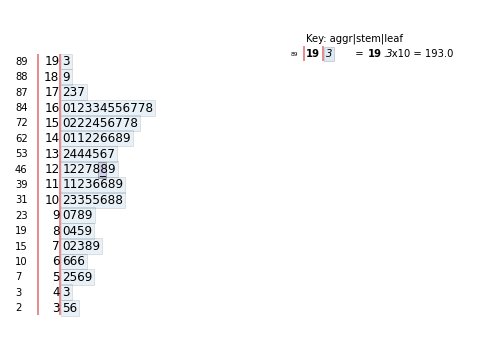

In [49]:
stemgraphic.stem_graphic(score.total, scale=10)

In [50]:
# 3.2 상자그림

In [51]:
import pandas as pd
import seaborn as sns

In [52]:
score = pd.read_csv('../data/score.csv')
score['total'] = score['midterm'] + score['final']

<AxesSubplot:xlabel='total'>

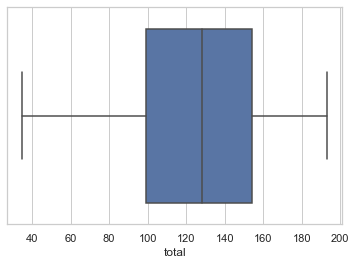

In [53]:
sns.set(style='whitegrid')
sns.boxplot(x='total', data=score)

<AxesSubplot:ylabel='total'>

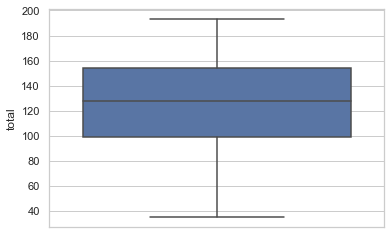

In [54]:
sns.boxplot(y='total', data=score)

<AxesSubplot:xlabel='gender', ylabel='total'>

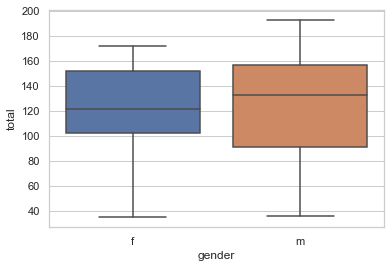

In [61]:
sns.boxplot(x='gender', y='total', data=score)

In [62]:
# 3.3 히스토그램

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
score = pd.read_csv('../data/score.csv')
score['total'] = score['midterm'] + score['final']

(array([ 3.,  7.,  6.,  6., 13., 11., 12., 16., 13.,  2.]),
 array([ 35. ,  50.8,  66.6,  82.4,  98.2, 114. , 129.8, 145.6, 161.4,
        177.2, 193. ]),
 <BarContainer object of 10 artists>)

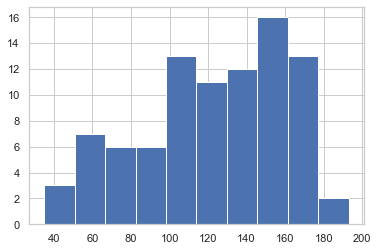

In [66]:
plt.hist(score.total)

In [67]:
ftotal = score.loc[score.gender=='f','total']

In [68]:
mtotal = score.loc[score.gender=='m','total']

In [71]:
args = dict(alpha=0.5, bins=10)
args

{'alpha': 0.5, 'bins': 10}

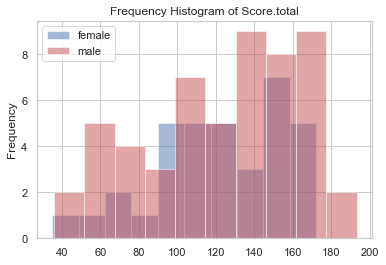

In [74]:
plt.hist(ftotal, **args, color='b', label='female')
plt.hist(mtotal, **args, color='r', label='male')
plt.gca().set(title='Frequency Histogram of Score.total', ylabel='Frequency')
plt.legend()
plt.show()

In [1]:
# 4.1 빈도표 및 분할표(1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
enqete = pd.read_csv('../data/enqete.csv')

In [4]:
enqete.head()

,college,grade,q1,q2
0,med,1,1.0,1
1,med,1,1.0,1
2,med,1,1.0,1
3,med,2,1.0,2
4,med,2,2.0,1


In [5]:
enqete_table = pd.crosstab(index=enqete['grade'], colnames=['Grade'], columns='count')

In [6]:
enqete_table

Grade,count
grade,
1,103
2,103
3,100
4,94


In [7]:
enqete_table.index = ['1학년', '2학년', '3학년', '4학년']

In [8]:
enqete_table

Grade,count
1학년,103
2학년,103
3학년,100
4학년,94


In [13]:
import pandas as pd
import numpy as np

In [14]:
grade_q1 = pd.crosstab(index=enqete['grade'], columns=enqete['q1'])
grade_q1.index = ['1학년', '2학년', '3학년', '4학년']
grade_q1

q1,0.0,1.0,2.0
1학년,0,80,23
2학년,0,66,37
3학년,0,55,44
4학년,1,55,38


In [16]:
enqete['q1'] = enqete['q1'].replace(0, np.NaN)
grade_q1 = pd.crosstab(index=enqete['grade'], columns=enqete['q1'])
grade_q1.index = ['1학년', '2학년', '3학년', '4학년']
grade_q1

q1,1.0,2.0
1학년,80,23
2학년,66,37
3학년,55,44
4학년,55,38


In [18]:
from scipy.stats import chi2_contingency

In [19]:
chi2_contingency(grade_q1)

(12.402787258488466,
 0.0061233649734963305,
 3,
 array([[66.25125628, 36.74874372],
        [66.25125628, 36.74874372],
        [63.67839196, 35.32160804],
        [59.81909548, 33.18090452]]))

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
enqete = pd.read_csv('../data/enqete.csv')
enqete_table = pd.crosstab(index=enqete['grade'], colnames=['Grade'], columns='count')

<BarContainer object of 4 artists>

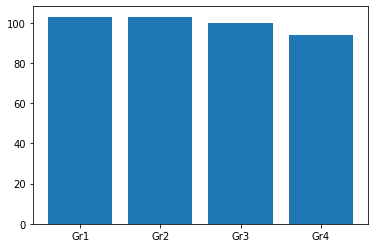

In [24]:
enqete_table.index = ['Gr1','Gr2','Gr3','Gr4']
plt.bar(enqete_table.index, enqete_table['count'])

([<matplotlib.patches.Wedge at 0x135e42220>,
 [Text(-0.795926740046034, 0.7592763821426907, 'Gr1'),
  Text(-0.7209402440089245, -0.83080994491421, 'Gr2'),
  Text(0.8475645040313471, -0.7011664649040888, 'Gr3'),
  Text(0.7403138395114514, 0.8135941365495534, 'Gr4')])

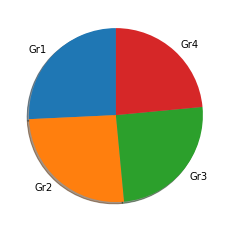

In [29]:
plt.pie(enqete_table['count'], labels=enqete_table.index, shadow=True, startangle=90)

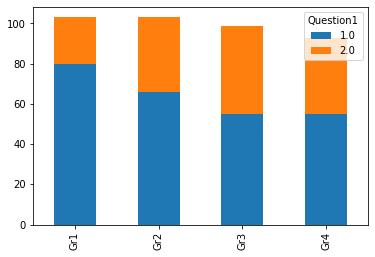

In [30]:
grade_q1.index=['Gr1', 'Gr2', 'Gr3', 'Gr4']
grade_q1.plot.bar(stacked=True)
plt.legend(title='Question1')